### 导包，ImageDataGenerator

In [5]:
import keras #keras疯转了Tensorflow操作变的简单而已
from keras.datasets import cifar10
# 序贯模型，我们就在序贯模型中添加神经网络结构
# 之前的网络模型：第一层计算了，交给第二层，第二层计算了交给第三层
# 依次类推
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

import tensorflow as tf
# 这是一个类，作用生成更多图片，基于原来的图片生成（有差异的） 
# ImageDataGenerator可以在原图的基础上，进行调整，图片数据，衍生
# 使用实时数据增强生成一批张量图像数据
from keras.preprocessing.image import ImageDataGenerator

### 加载数据，类型变换，归一化和one-hot编码

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# 归一化，除255，为什么jpg，0~255，数值表示，图片的像素值
# 数值归一化到0~1
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train,num_classes=10)
# 独热编码
y_test = keras.utils.to_categorical(y_test,num_classes=10)
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

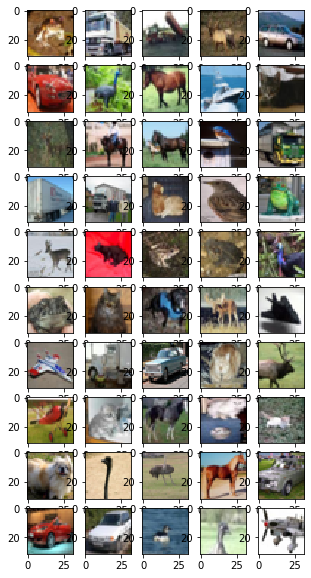

In [3]:
plt.figure(figsize=(1*5,1*10))
for i in range(50):
    ax = plt.subplot(10,5,i+1)
    image = X_train[i]
    ax.imshow(image)

### 声明变量

In [4]:
batch_size = 32
num_classes = 10
epochs = 100

### keras生成的模型 就是CNN类似VGG模型

In [7]:
input_layer = Input(shape = (32,32,3))
x = Conv2D(32, (3, 3), padding='same',input_shape=[32,32,3],activation='relu')(input_layer)
x = Conv2D(32, (3, 3),activation = tf.nn.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
x = Conv2D(64, (3, 3),activation = keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(num_classes,activation='softmax')(x)
model = Model(inputs = input_layer,outputs = out_layer)

### 告诉算法，损失用什么，优化用什么，评价指标用什么

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
model.load_weights('./keras-cifar-10-trained-model.h5')

### 上面加载了之前训练好的模型的系数权重

### 直接进行应用

In [10]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 5s 522us/step


[0.6641710855960846, 0.7728000283241272]

### 模型训练（花费的时间比较长）

### 这次训练的时候，使用ImageDataGenerator生成数据

In [11]:
datagen = ImageDataGenerator(rotation_range=180)

In [12]:
datagen.fit(X_train)

In [14]:
# keras特别像之前sklearn中算法训练方式
model.fit(datagen.flow(X_train,y_train,batch_size = batch_size),#训练数据
              epochs=10,#进行多少次训练
              validation_data=(X_test, y_test),#验证，测试数据
              shuffle=True,workers=4)#打乱数据的顺序

Epoch 1/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.5965 - accuracy: 0.4282 - val_loss: 1.2156 - val_accuracy: 0.5856
Epoch 2/10
1563/1563 [==============================] - 170s 109ms/step - loss: 1.4671 - accuracy: 0.4764 - val_loss: 1.2219 - val_accuracy: 0.5776
Epoch 3/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.4101 - accuracy: 0.4945 - val_loss: 1.2330 - val_accuracy: 0.5768
Epoch 4/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.3749 - accuracy: 0.5066 - val_loss: 1.2156 - val_accuracy: 0.5766
Epoch 5/10
1563/1563 [==============================] - 158s 101ms/step - loss: 1.3497 - accuracy: 0.5159 - val_loss: 1.1617 - val_accuracy: 0.5927
Epoch 6/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.3241 - accuracy: 0.5288 - val_loss: 1.1477 - val_accuracy: 0.5941
Epoch 7/10
1563/1563 [==============================] - 173s 111ms/step - loss: 1.3088 - accuracy: 0.5353 - val_

### 上面一步步模型构建和训练过程

### 将辛辛苦苦，训练好的模型保存

In [15]:
moded_name = 'keras-cifar-10-trained-model2.h5'
model.save(moded_name)